# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = df = pd.read_csv('data/CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
data.shape

(205, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [8]:
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])

In [9]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [10]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
import seaborn as sns

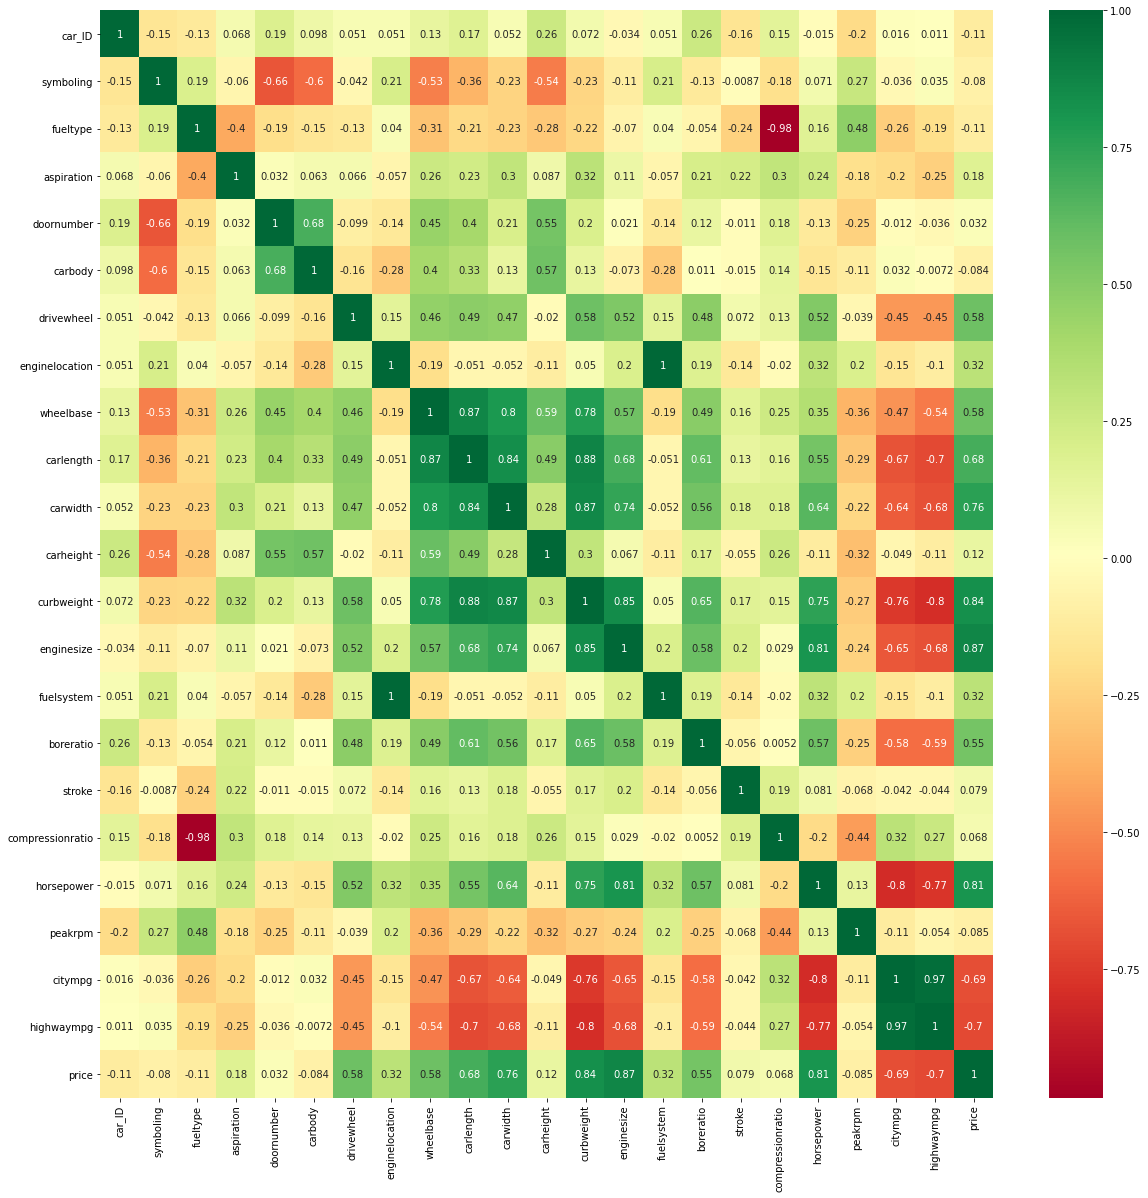

In [15]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
data_clean = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [18]:
data_clean.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


In [21]:
train = data_clean.sample(frac=0.7, random_state=0)
valid = data_clean.drop(train.index)

validat = valid.sample(frac=0.6, random_state=0)
test = valid.drop(validat.index)

In [22]:
train.shape, validat.shape, test.shape

((144, 10), (37, 10), (24, 10))

In [82]:
X_train = train.drop('price', axis=1)
X_valid = validat.drop('price', axis=1)
X_test  =  test.drop('price', axis=1)

y_train = train['price']
y_valid = validat['price']
y_test = test['price']

In [83]:
X_train.shape, X_valid.shape, X_test.shape

((144, 9), (37, 9), (24, 9))

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam, SGD
from keras import regularizers

In [66]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(9,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [67]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
                                            y_train[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(X_valid, y_valid, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 166809848.7339 - mae: 10951.4492
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 44950040.7982 - mae: 4387.5816
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 38271131.5780 - mae: 4580.3499
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 42789495.7339 - mae: 4430.2517
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 48202296.5092 - mae: 4870.9754
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 46743683.6743 - mae: 4886.5855
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 39345938.9358 - mae: 4198.9900A: 0s - loss: 39009766.7059 - mae: 4113.2
Epoch 8/100
108/108 [==============================] - 0s 3ms/step - loss: 33000463.1376 - mae: 3968.6754
Epoch 9/100
108/108 [==============================] - 0s 4ms/step - loss: 31907752.8119 

108/108 [==============================] - 0s 2ms/step - loss: 16878894.8670 - mae: 2739.1265
Epoch 75/100
108/108 [==============================] - 0s 3ms/step - loss: 12703689.0275 - mae: 2718.5285
Epoch 76/100
108/108 [==============================] - 0s 2ms/step - loss: 22715310.2110 - mae: 3549.4759
Epoch 77/100
108/108 [==============================] - 0s 2ms/step - loss: 16719999.0344 - mae: 2941.4608
Epoch 78/100
108/108 [==============================] - 0s 3ms/step - loss: 18266600.4679 - mae: 3073.8036
Epoch 79/100
108/108 [==============================] - 0s 2ms/step - loss: 21232564.8165 - mae: 3404.8582
Epoch 80/100
108/108 [==============================] - 0s 1ms/step - loss: 26123920.1928 - mae: 3431.6741
Epoch 81/100
108/108 [==============================] - 0s 2ms/step - loss: 18223933.0757 - mae: 3041.6628
Epoch 82/100
108/108 [==============================] - 0s 2ms/step - loss: 25476098.5860 - mae: 3533.7052
Epoch 83/100
108/108 [============================

108/108 [==============================] - 0s 4ms/step - loss: 20861075.9715 - mae: 3412.0502
Epoch 49/100
108/108 [==============================] - 0s 3ms/step - loss: 21897330.5321 - mae: 3432.3233
Epoch 50/100
108/108 [==============================] - 0s 2ms/step - loss: 24792834.6651 - mae: 3965.6654
Epoch 51/100
108/108 [==============================] - 0s 2ms/step - loss: 18851895.5872 - mae: 3079.5400
Epoch 52/100
108/108 [==============================] - 0s 2ms/step - loss: 20811195.2867 - mae: 3555.6835
Epoch 53/100
108/108 [==============================] - 0s 3ms/step - loss: 24510492.9128 - mae: 3640.7384
Epoch 54/100
108/108 [==============================] - ETA: 0s - loss: 28463384.2290 - mae: 4114.482 - 0s 3ms/step - loss: 28110584.6709 - mae: 4079.3018
Epoch 55/100
108/108 [==============================] - 0s 3ms/step - loss: 18740733.9236 - mae: 3043.1265 0s - loss: 10384445.6816 - mae: 2306.8
Epoch 56/100
108/108 [==============================] - 0s 3ms/step - 

108/108 [==============================] - 0s 3ms/step - loss: 24163717.9817 - mae: 3778.9699
Epoch 23/100
108/108 [==============================] - 0s 2ms/step - loss: 32908286.2514 - mae: 4212.7759
Epoch 24/100
108/108 [==============================] - 0s 2ms/step - loss: 29058013.2523 - mae: 3917.8949
Epoch 25/100
108/108 [==============================] - 0s 2ms/step - loss: 29479476.0046 - mae: 4089.2901
Epoch 26/100
108/108 [==============================] - 0s 2ms/step - loss: 24634139.8532 - mae: 3354.1040
Epoch 27/100
108/108 [==============================] - 0s 2ms/step - loss: 40230178.6147 - mae: 4689.5042
Epoch 28/100
108/108 [==============================] - 0s 2ms/step - loss: 28873537.6239 - mae: 4011.2806
Epoch 29/100
108/108 [==============================] - 0s 2ms/step - loss: 47019227.4679 - mae: 4825.5161
Epoch 30/100
108/108 [==============================] - 0s 2ms/step - loss: 25992615.9817 - mae: 3880.7541
Epoch 31/100
108/108 [============================

108/108 [==============================] - 0s 2ms/step - loss: 13067835.9289 - mae: 2337.5184
Epoch 99/100
108/108 [==============================] - 0s 3ms/step - loss: 14814100.7230 - mae: 2544.4178
Epoch 100/100
2/2 [==============================] - 0s 4ms/step - loss: 11675059.0000 - mae: 2251.3367
processing fold # 3
Epoch 1/100
108/108 [==============================] - 1s 1ms/step - loss: 194047944.8073 - mae: 11287.9819
Epoch 2/100
108/108 [==============================] - 0s 2ms/step - loss: 56224836.5738 - mae: 4167.2291
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 38340250.4386 - mae: 3968.1695
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 44568077.3853 - mae: 4508.4992
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 46452344.9633 - mae: 4160.2859
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 33497274.7339 - mae: 3970.7803
Epoch 7/100
108/108 [================

108/108 [==============================] - 0s 3ms/step - loss: 27105634.4220 - mae: 3411.9162
Epoch 73/100
108/108 [==============================] - 0s 2ms/step - loss: 14845544.6101 - mae: 2491.2547
Epoch 74/100
108/108 [==============================] - 0s 1ms/step - loss: 12597985.8532 - mae: 2467.9604
Epoch 75/100
108/108 [==============================] - 0s 1ms/step - loss: 14903533.2110 - mae: 2551.0201
Epoch 76/100
108/108 [==============================] - 0s 1ms/step - loss: 28234027.2047 - mae: 3212.8230
Epoch 77/100
108/108 [==============================] - 0s 2ms/step - loss: 19147112.6697 - mae: 3049.5505
Epoch 78/100
108/108 [==============================] - 0s 1ms/step - loss: 15433742.3440 - mae: 2658.6776
Epoch 79/100
108/108 [==============================] - 0s 1ms/step - loss: 9680091.5390 - mae: 2097.2329
Epoch 80/100
108/108 [==============================] - 0s 1ms/step - loss: 21266467.3108 - mae: 2838.9321
Epoch 81/100
108/108 [=============================

In [68]:
all_scores

[2399.86376953125, 2386.3046875, 2251.336669921875, 2601.02587890625]

In [69]:
np.mean(all_scores)

2409.6327514648438

In [70]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(X_valid, y_valid),epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/500
108/108 [==============================] - 1s 5ms/step - loss: 126437487.7064 - mae: 9659.5043 - val_loss: 61040536.0000 - val_mae: 4691.8672
Epoch 2/500
108/108 [==============================] - 1s 5ms/step - loss: 58364323.5011 - mae: 4511.3673 - val_loss: 31295498.0000 - val_mae: 4046.0452
Epoch 3/500
108/108 [==============================] - 0s 3ms/step - loss: 17689413.8417 - mae: 2986.9676 - val_loss: 30236586.0000 - val_mae: 4413.7925
Epoch 4/500
108/108 [==============================] - 0s 3ms/step - loss: 27028548.1927 - mae: 3805.8489 - val_loss: 30189198.0000 - val_mae: 4434.9185
Epoch 5/500
108/108 [==============================] - 0s 4ms/step - loss: 28953084.3853 - mae: 4122.0839 - val_loss: 29895306.0000 - val_mae: 4253.1943
Epoch 6/500
108/108 [==============================] - 0s 3ms/step - loss: 19752382.2569 - mae: 3407.1955 - val_loss: 29790602.0000 - val_mae: 4243.2109
Epoch 7/500
108/108 [==============================] - 0s 2ms

Epoch 49/500
108/108 [==============================] - 0s 3ms/step - loss: 40014663.1927 - mae: 4196.6098 - val_loss: 25060268.0000 - val_mae: 3700.8132
Epoch 50/500
108/108 [==============================] - 0s 2ms/step - loss: 30444681.6881 - mae: 3936.9423 - val_loss: 24908966.0000 - val_mae: 3682.9387
Epoch 51/500
108/108 [==============================] - 0s 2ms/step - loss: 26420776.2294 - mae: 3817.7792 - val_loss: 24195132.0000 - val_mae: 3882.8530
Epoch 52/500
108/108 [==============================] - 0s 2ms/step - loss: 25322962.6680 - mae: 3808.1707 - val_loss: 24140742.0000 - val_mae: 3711.4734
Epoch 53/500
108/108 [==============================] - 0s 2ms/step - loss: 25165451.4817 - mae: 3702.3692 - val_loss: 24314820.0000 - val_mae: 3629.5571
Epoch 54/500
108/108 [==============================] - 0s 2ms/step - loss: 24075547.7385 - mae: 3540.5288 - val_loss: 23629322.0000 - val_mae: 3710.7791
Epoch 55/500
108/108 [==============================] - 0s 2ms/step - loss: 

108/108 [==============================] - 0s 2ms/step - loss: 13206478.5275 - mae: 2499.3942 - val_loss: 12042813.0000 - val_mae: 2392.8008
Epoch 103/500
108/108 [==============================] - 0s 2ms/step - loss: 10586757.9266 - mae: 2237.7226 - val_loss: 11944845.0000 - val_mae: 2321.9846
Epoch 104/500
108/108 [==============================] - 0s 2ms/step - loss: 12069501.8968 - mae: 2449.2656 - val_loss: 11857728.0000 - val_mae: 2314.2917
Epoch 105/500
108/108 [==============================] - 0s 2ms/step - loss: 10676009.4753 - mae: 2237.7060 - val_loss: 12678295.0000 - val_mae: 2664.0066
Epoch 106/500
108/108 [==============================] - 0s 2ms/step - loss: 11166244.3933 - mae: 2351.8397 - val_loss: 12123222.0000 - val_mae: 2495.8132
Epoch 107/500
108/108 [==============================] - 0s 2ms/step - loss: 11666547.1307 - mae: 2307.0081 - val_loss: 11782090.0000 - val_mae: 2288.6570
Epoch 108/500
108/108 [==============================] - 0s 2ms/step - loss: 1212391

108/108 [==============================] - 0s 2ms/step - loss: 9215144.0917 - mae: 2199.1061 - val_loss: 13785374.0000 - val_mae: 2782.2585
Epoch 156/500
108/108 [==============================] - 0s 2ms/step - loss: 8660083.7156 - mae: 2190.3830 - val_loss: 11576728.0000 - val_mae: 2288.0024
Epoch 157/500
108/108 [==============================] - 0s 2ms/step - loss: 9229417.1445 - mae: 2097.4536 - val_loss: 11507780.0000 - val_mae: 2242.7195
Epoch 158/500
108/108 [==============================] - 0s 2ms/step - loss: 11451237.4100 - mae: 2282.4029 - val_loss: 12211336.0000 - val_mae: 2475.9534
Epoch 159/500
108/108 [==============================] - 0s 3ms/step - loss: 11390905.9581 - mae: 2396.7720 - val_loss: 12176115.0000 - val_mae: 2462.0647
Epoch 160/500
108/108 [==============================] - 0s 2ms/step - loss: 10491612.5373 - mae: 2299.8540 - val_loss: 11605556.0000 - val_mae: 2301.0227
Epoch 161/500
108/108 [==============================] - 0s 2ms/step - loss: 10177631.3

108/108 [==============================] - 0s 2ms/step - loss: 12863207.0505 - mae: 2528.3378 - val_loss: 11791263.0000 - val_mae: 2341.5283
Epoch 209/500
108/108 [==============================] - 0s 2ms/step - loss: 13421578.7878 - mae: 2557.3023 - val_loss: 12526849.0000 - val_mae: 2384.4143
Epoch 210/500
108/108 [==============================] - 0s 2ms/step - loss: 9512972.9495 - mae: 2149.0826 - val_loss: 12135490.0000 - val_mae: 2461.5376
Epoch 211/500
108/108 [==============================] - 0s 2ms/step - loss: 13838776.7810 - mae: 2741.5769 - val_loss: 11504509.0000 - val_mae: 2254.0103
Epoch 212/500
108/108 [==============================] - 0s 2ms/step - loss: 11834336.2110 - mae: 2325.5157 - val_loss: 11644834.0000 - val_mae: 2268.8276
Epoch 213/500
108/108 [==============================] - 0s 2ms/step - loss: 11310288.6932 - mae: 2419.5155 - val_loss: 11439114.0000 - val_mae: 2258.7085
Epoch 214/500
108/108 [==============================] - 0s 2ms/step - loss: 9137044.

108/108 [==============================] - 0s 4ms/step - loss: 11862474.2844 - mae: 2395.1699 - val_loss: 12643970.0000 - val_mae: 2578.6135
Epoch 262/500
108/108 [==============================] - 0s 4ms/step - loss: 12396193.4119 - mae: 2405.7658 - val_loss: 11981878.0000 - val_mae: 2366.0442
Epoch 263/500
108/108 [==============================] - 1s 6ms/step - loss: 9038149.6663 - mae: 2119.7016 - val_loss: 12353554.0000 - val_mae: 2376.5500
Epoch 264/500
108/108 [==============================] - 0s 3ms/step - loss: 11504667.8906 - mae: 2450.5058 - val_loss: 12132532.0000 - val_mae: 2394.9172
Epoch 265/500
108/108 [==============================] - 0s 3ms/step - loss: 11377290.2206 - mae: 2173.6207 - val_loss: 13566864.0000 - val_mae: 2693.0132
Epoch 266/500
108/108 [==============================] - 0s 3ms/step - loss: 8641913.1852 - mae: 2025.9053 - val_loss: 13686640.0000 - val_mae: 2477.1799
Epoch 267/500
108/108 [==============================] - 0s 2ms/step - loss: 13005096.

108/108 [==============================] - 0s 2ms/step - loss: 11984639.3320 - mae: 2242.8760 - val_loss: 17225268.0000 - val_mae: 3094.2178
Epoch 314/500
108/108 [==============================] - 0s 2ms/step - loss: 10298962.6009 - mae: 2385.1626 - val_loss: 11664648.0000 - val_mae: 2298.0176
Epoch 315/500
108/108 [==============================] - 0s 2ms/step - loss: 14159024.2018 - mae: 2603.3265 - val_loss: 12210446.0000 - val_mae: 2452.9160
Epoch 316/500
108/108 [==============================] - 0s 2ms/step - loss: 9444660.0883 - mae: 2157.2877 - val_loss: 18047852.0000 - val_mae: 3263.1179
Epoch 317/500
108/108 [==============================] - 0s 2ms/step - loss: 13854420.8486 - mae: 2500.2167 - val_loss: 11486145.0000 - val_mae: 2333.0242
Epoch 318/500
108/108 [==============================] - 0s 2ms/step - loss: 9963474.5277 - mae: 2038.0264 - val_loss: 14054407.0000 - val_mae: 2691.7649
Epoch 319/500
108/108 [==============================] - 0s 2ms/step - loss: 13124171.

Epoch 366/500
108/108 [==============================] - 0s 2ms/step - loss: 8165537.4083 - mae: 2093.0301 - val_loss: 11791170.0000 - val_mae: 2333.3323
Epoch 367/500
108/108 [==============================] - 0s 2ms/step - loss: 11257559.4322 - mae: 2256.4607 - val_loss: 13357097.0000 - val_mae: 2666.6675
Epoch 368/500
108/108 [==============================] - 0s 2ms/step - loss: 10629076.5642 - mae: 2178.2100 - val_loss: 12414410.0000 - val_mae: 2503.8728
Epoch 369/500
108/108 [==============================] - 0s 2ms/step - loss: 12993662.8257 - mae: 2636.0831 - val_loss: 12884947.0000 - val_mae: 2578.0081
Epoch 370/500
108/108 [==============================] - 0s 2ms/step - loss: 10155848.7959 - mae: 2215.8531 - val_loss: 11402989.0000 - val_mae: 2303.2229
Epoch 371/500
108/108 [==============================] - 0s 2ms/step - loss: 11256298.3091 - mae: 2194.3315 - val_loss: 11462207.0000 - val_mae: 2320.2607
Epoch 372/500
108/108 [==============================] - 0s 2ms/step - 

Epoch 419/500
108/108 [==============================] - 0s 4ms/step - loss: 7753112.0505 - mae: 1981.6195 - val_loss: 11798017.0000 - val_mae: 2462.3069
Epoch 420/500
108/108 [==============================] - 0s 3ms/step - loss: 14097459.8807 - mae: 2408.2816 - val_loss: 13413329.0000 - val_mae: 2722.4507
Epoch 421/500
108/108 [==============================] - 0s 4ms/step - loss: 12293430.1835 - mae: 2497.2467 - val_loss: 11370875.0000 - val_mae: 2306.4836
Epoch 422/500
108/108 [==============================] - 0s 3ms/step - loss: 12484573.1376 - mae: 2406.5553 - val_loss: 13244443.0000 - val_mae: 2713.3665
Epoch 423/500
108/108 [==============================] - 0s 3ms/step - loss: 7982236.6032 - mae: 2118.0083 - val_loss: 12411501.0000 - val_mae: 2380.6570
Epoch 424/500
108/108 [==============================] - 0s 2ms/step - loss: 8443369.1009 - mae: 2096.8011 - val_loss: 12242264.0000 - val_mae: 2520.6543
Epoch 425/500
108/108 [==============================] - 0s 3ms/step - lo

Epoch 472/500
108/108 [==============================] - 0s 2ms/step - loss: 10777495.5298 - mae: 2269.2921 - val_loss: 11601948.0000 - val_mae: 2342.8716
Epoch 473/500
108/108 [==============================] - 0s 2ms/step - loss: 11980078.9060 - mae: 2289.5003 - val_loss: 11828671.0000 - val_mae: 2409.7327
Epoch 474/500
108/108 [==============================] - 0s 2ms/step - loss: 9695623.6901 - mae: 2142.2652 - val_loss: 12290102.0000 - val_mae: 2538.0100
Epoch 475/500
108/108 [==============================] - 0s 2ms/step - loss: 11511234.4442 - mae: 2195.6209 - val_loss: 12245705.0000 - val_mae: 2408.1064
Epoch 476/500
108/108 [==============================] - 0s 2ms/step - loss: 11000824.1790 - mae: 2292.8604 - val_loss: 13172143.0000 - val_mae: 2621.3823
Epoch 477/500
108/108 [==============================] - 0s 2ms/step - loss: 9871471.6835 - mae: 2276.5932 - val_loss: 11668741.0000 - val_mae: 2399.7944
Epoch 478/500
108/108 [==============================] - 0s 3ms/step - l

Epoch 25/500
108/108 [==============================] - 0s 2ms/step - loss: 27268435.9083 - mae: 3831.0860 - val_loss: 26981324.0000 - val_mae: 3943.1006
Epoch 26/500
108/108 [==============================] - 0s 2ms/step - loss: 34027557.8899 - mae: 4249.4296 - val_loss: 27091258.0000 - val_mae: 3869.2461
Epoch 27/500
108/108 [==============================] - 0s 4ms/step - loss: 26872814.2248 - mae: 3876.6581 - val_loss: 29823558.0000 - val_mae: 3645.9885
Epoch 28/500
108/108 [==============================] - 0s 2ms/step - loss: 41496557.0573 - mae: 4555.6389 - val_loss: 26309958.0000 - val_mae: 3925.0522
Epoch 29/500
108/108 [==============================] - 0s 3ms/step - loss: 37567985.0917 - mae: 4617.0033 - val_loss: 28363896.0000 - val_mae: 3659.3335
Epoch 30/500
108/108 [==============================] - 0s 2ms/step - loss: 34568849.6376 - mae: 4074.3545 - val_loss: 27425524.0000 - val_mae: 3692.4526
Epoch 31/500
108/108 [==============================] - 0s 2ms/step - loss: 

108/108 [==============================] - 0s 2ms/step - loss: 15768579.4989 - mae: 2941.1994 - val_loss: 12038636.0000 - val_mae: 2307.3328
Epoch 79/500
108/108 [==============================] - 0s 2ms/step - loss: 11361540.8922 - mae: 2344.1342 - val_loss: 11925212.0000 - val_mae: 2411.0886
Epoch 80/500
108/108 [==============================] - 0s 2ms/step - loss: 9757362.6595 - mae: 2128.2142 - val_loss: 12066136.0000 - val_mae: 2469.7568
Epoch 81/500
108/108 [==============================] - 0s 2ms/step - loss: 11568185.2661 - mae: 2575.1617 - val_loss: 13248207.0000 - val_mae: 2388.5085
Epoch 82/500
108/108 [==============================] - 0s 2ms/step - loss: 9379464.2311 - mae: 2186.7293 - val_loss: 13056058.0000 - val_mae: 2743.0137
Epoch 83/500
108/108 [==============================] - 0s 2ms/step - loss: 14817760.2099 - mae: 2528.2818 - val_loss: 11752723.0000 - val_mae: 2256.0476
Epoch 84/500
108/108 [==============================] - 0s 2ms/step - loss: 15240160.8532 -

108/108 [==============================] - 0s 2ms/step - loss: 9549323.7374 - mae: 2278.9583 - val_loss: 11844078.0000 - val_mae: 2483.8901
Epoch 132/500
108/108 [==============================] - 0s 2ms/step - loss: 9643742.7385 - mae: 2294.7509 - val_loss: 11344534.0000 - val_mae: 2347.2732
Epoch 133/500
108/108 [==============================] - 0s 2ms/step - loss: 15453261.3108 - mae: 2762.9079 - val_loss: 11401224.0000 - val_mae: 2237.7363
Epoch 134/500
108/108 [==============================] - 0s 2ms/step - loss: 8309281.3139 - mae: 2052.4115 - val_loss: 11250666.0000 - val_mae: 2203.5984
Epoch 135/500
108/108 [==============================] - 0s 2ms/step - loss: 10018870.9083 - mae: 2096.4833 - val_loss: 11227830.0000 - val_mae: 2318.2510
Epoch 136/500
108/108 [==============================] - 0s 2ms/step - loss: 11089459.4262 - mae: 2305.7415 - val_loss: 12944780.0000 - val_mae: 2708.5000
Epoch 137/500
108/108 [==============================] - 0s 3ms/step - loss: 11096881.9

108/108 [==============================] - 0s 2ms/step - loss: 12963962.3978 - mae: 2293.0704 - val_loss: 10913700.0000 - val_mae: 2249.8127
Epoch 185/500
108/108 [==============================] - 0s 2ms/step - loss: 17043073.7939 - mae: 2897.4571 - val_loss: 13443760.0000 - val_mae: 2797.2883
Epoch 186/500
108/108 [==============================] - 0s 2ms/step - loss: 15389739.7904 - mae: 2705.3988 - val_loss: 12490456.0000 - val_mae: 2599.6101
Epoch 187/500
108/108 [==============================] - 1s 7ms/step - loss: 9665916.8588 - mae: 2167.0873 - val_loss: 11396431.0000 - val_mae: 2392.8835
Epoch 188/500
108/108 [==============================] - 0s 4ms/step - loss: 7758120.2489 - mae: 1985.6332 - val_loss: 10995556.0000 - val_mae: 2221.8901
Epoch 189/500
108/108 [==============================] - 0s 3ms/step - loss: 12429256.2061 - mae: 2170.4672 - val_loss: 13101537.0000 - val_mae: 2729.0598
Epoch 190/500
108/108 [==============================] - 0s 2ms/step - loss: 15154209.

108/108 [==============================] - 0s 2ms/step - loss: 7334318.6265 - mae: 2081.4454 - val_loss: 11412163.0000 - val_mae: 2472.5713
Epoch 238/500
108/108 [==============================] - 0s 2ms/step - loss: 10284644.6656 - mae: 2274.8190 - val_loss: 11352992.0000 - val_mae: 2438.9641
Epoch 239/500
108/108 [==============================] - 0s 2ms/step - loss: 13458639.6514 - mae: 2525.2082 - val_loss: 12039710.0000 - val_mae: 2583.4180
Epoch 240/500
108/108 [==============================] - 0s 2ms/step - loss: 11249057.8165 - mae: 2328.1069 - val_loss: 10819531.0000 - val_mae: 2213.8303
Epoch 241/500
108/108 [==============================] - 0s 2ms/step - loss: 9511409.9243 - mae: 2357.8367 - val_loss: 12026884.0000 - val_mae: 2514.4785
Epoch 242/500
108/108 [==============================] - 0s 2ms/step - loss: 11831328.0963 - mae: 2406.9883 - val_loss: 12358551.0000 - val_mae: 2601.5408
Epoch 243/500
108/108 [==============================] - 0s 3ms/step - loss: 11797136.

108/108 [==============================] - 0s 2ms/step - loss: 12358745.5333 - mae: 2416.5825 - val_loss: 10799046.0000 - val_mae: 2243.4429
Epoch 291/500
108/108 [==============================] - 0s 2ms/step - loss: 13655328.1365 - mae: 2621.2146 - val_loss: 10892250.0000 - val_mae: 2274.3652
Epoch 292/500
108/108 [==============================] - 0s 2ms/step - loss: 12831503.5550 - mae: 2636.8944 - val_loss: 12857981.0000 - val_mae: 2396.5808
Epoch 293/500
108/108 [==============================] - 0s 2ms/step - loss: 9621269.2248 - mae: 2331.8944 - val_loss: 21496148.0000 - val_mae: 3843.8716
Epoch 294/500
108/108 [==============================] - 0s 2ms/step - loss: 15428374.0000 - mae: 2902.3584 - val_loss: 11258944.0000 - val_mae: 2366.9468
Epoch 295/500
108/108 [==============================] - 0s 2ms/step - loss: 12386903.1899 - mae: 2506.3737 - val_loss: 11922598.0000 - val_mae: 2480.6687
Epoch 296/500
108/108 [==============================] - 0s 2ms/step - loss: 10598305

108/108 [==============================] - 0s 2ms/step - loss: 14544024.1479 - mae: 2470.7277 - val_loss: 11262133.0000 - val_mae: 2406.3777
Epoch 344/500
108/108 [==============================] - 0s 2ms/step - loss: 13479428.9335 - mae: 2632.3640 - val_loss: 12200932.0000 - val_mae: 2690.0889
Epoch 345/500
108/108 [==============================] - 1s 6ms/step - loss: 11708378.2339 - mae: 2660.5234 - val_loss: 11816138.0000 - val_mae: 2317.1978
Epoch 346/500
108/108 [==============================] - 0s 3ms/step - loss: 10466081.5757 - mae: 2308.8417 - val_loss: 11055460.0000 - val_mae: 2373.0481
Epoch 347/500
108/108 [==============================] - 0s 3ms/step - loss: 8630761.7328 - mae: 2150.1192 - val_loss: 12051512.0000 - val_mae: 2547.4890
Epoch 348/500
108/108 [==============================] - 0s 3ms/step - loss: 12432699.6101 - mae: 2476.5546 - val_loss: 10478774.0000 - val_mae: 2234.7795
Epoch 349/500
108/108 [==============================] - 0s 2ms/step - loss: 12155768

108/108 [==============================] - 0s 3ms/step - loss: 11138249.5183 - mae: 2493.2085 - val_loss: 13935463.0000 - val_mae: 2885.9734
Epoch 397/500
108/108 [==============================] - 0s 2ms/step - loss: 11637300.2982 - mae: 2450.6236 - val_loss: 10445843.0000 - val_mae: 2280.2339
Epoch 398/500
108/108 [==============================] - 0s 4ms/step - loss: 8957831.4553 - mae: 2124.8963 - val_loss: 11609994.0000 - val_mae: 2511.7900
Epoch 399/500
108/108 [==============================] - 0s 2ms/step - loss: 13956963.6789 - mae: 2849.4248 - val_loss: 11636174.0000 - val_mae: 2545.8611
Epoch 400/500
108/108 [==============================] - 0s 4ms/step - loss: 14316793.3945 - mae: 2529.3052 - val_loss: 10997552.0000 - val_mae: 2401.7393
Epoch 401/500
108/108 [==============================] - 1s 5ms/step - loss: 11230525.7087 - mae: 2361.6320 - val_loss: 10474774.0000 - val_mae: 2216.5164
Epoch 402/500
108/108 [==============================] - 1s 5ms/step - loss: 12344750

108/108 [==============================] - 0s 4ms/step - loss: 11268293.5711 - mae: 2351.1143 - val_loss: 11263473.0000 - val_mae: 2453.5996
Epoch 450/500
108/108 [==============================] - 0s 3ms/step - loss: 18269379.2615 - mae: 2882.0324 - val_loss: 11407990.0000 - val_mae: 2298.5376
Epoch 451/500
108/108 [==============================] - 0s 2ms/step - loss: 11532131.8532 - mae: 2363.1567 - val_loss: 10661641.0000 - val_mae: 2285.6646
Epoch 452/500
108/108 [==============================] - 0s 3ms/step - loss: 10701871.0212 - mae: 2308.4068 - val_loss: 11111344.0000 - val_mae: 2351.9326
Epoch 453/500
108/108 [==============================] - 0s 4ms/step - loss: 13548496.0963 - mae: 2580.2926 - val_loss: 10365027.0000 - val_mae: 2221.4221
Epoch 454/500
108/108 [==============================] - 0s 2ms/step - loss: 12898424.8968 - mae: 2533.9421 - val_loss: 10779658.0000 - val_mae: 2310.0776
Epoch 455/500
108/108 [==============================] - 0s 2ms/step - loss: 1300740

Epoch 2/500
108/108 [==============================] - 0s 3ms/step - loss: 36728890.6789 - mae: 4279.2663 - val_loss: 30203246.0000 - val_mae: 4187.9360
Epoch 3/500
108/108 [==============================] - 0s 2ms/step - loss: 25441217.6239 - mae: 3831.1303 - val_loss: 30853996.0000 - val_mae: 4052.0071
Epoch 4/500
108/108 [==============================] - 0s 2ms/step - loss: 38272913.4679 - mae: 4640.9818 - val_loss: 30164688.0000 - val_mae: 4127.6333
Epoch 5/500
108/108 [==============================] - 0s 3ms/step - loss: 27719855.7339 - mae: 3789.7621 - val_loss: 29883994.0000 - val_mae: 4158.0015
Epoch 6/500
108/108 [==============================] - 0s 2ms/step - loss: 35088247.8440 - mae: 4128.6589 - val_loss: 30183102.0000 - val_mae: 4071.9688
Epoch 7/500
108/108 [==============================] - 0s 2ms/step - loss: 21990220.3303 - mae: 3283.7488 - val_loss: 29553968.0000 - val_mae: 4297.6528
Epoch 8/500
108/108 [==============================] - 0s 2ms/step - loss: 4056448

108/108 [==============================] - 0s 2ms/step - loss: 32873263.9817 - mae: 3901.0478 - val_loss: 20669420.0000 - val_mae: 3535.1350
Epoch 56/500
108/108 [==============================] - 0s 4ms/step - loss: 34799362.9908 - mae: 4071.4704 - val_loss: 20498600.0000 - val_mae: 3347.2964
Epoch 57/500
108/108 [==============================] - 0s 3ms/step - loss: 31719830.9174 - mae: 4024.8537 - val_loss: 20249672.0000 - val_mae: 3286.7256
Epoch 58/500
108/108 [==============================] - 0s 2ms/step - loss: 17291760.2982 - mae: 2933.5819 - val_loss: 19985672.0000 - val_mae: 3639.9028
Epoch 59/500
108/108 [==============================] - 0s 2ms/step - loss: 15492837.8440 - mae: 3116.6617 - val_loss: 19547456.0000 - val_mae: 3574.1394
Epoch 60/500
108/108 [==============================] - 0s 3ms/step - loss: 21560979.1193 - mae: 3199.9522 - val_loss: 19250116.0000 - val_mae: 3566.7603
Epoch 61/500
108/108 [==============================] - 0s 3ms/step - loss: 27810823.3578

Epoch 108/500
108/108 [==============================] - 0s 3ms/step - loss: 12319360.2018 - mae: 2503.4506 - val_loss: 11244944.0000 - val_mae: 2309.4429
Epoch 109/500
108/108 [==============================] - 0s 2ms/step - loss: 9424530.9513 - mae: 2124.5951 - val_loss: 11685376.0000 - val_mae: 2449.0430
Epoch 110/500
108/108 [==============================] - 0s 3ms/step - loss: 15199169.7431 - mae: 2704.7132 - val_loss: 11224939.0000 - val_mae: 2168.5747
Epoch 111/500
108/108 [==============================] - 0s 4ms/step - loss: 14713801.9149 - mae: 2526.6092 - val_loss: 11129499.0000 - val_mae: 2194.1384
Epoch 112/500
108/108 [==============================] - 0s 2ms/step - loss: 13530973.8641 - mae: 2315.2142 - val_loss: 12250221.0000 - val_mae: 2582.1775
Epoch 113/500
108/108 [==============================] - 0s 2ms/step - loss: 14191888.5321 - mae: 2528.2778 - val_loss: 11186899.0000 - val_mae: 2287.0652
Epoch 114/500
108/108 [==============================] - 0s 2ms/step - 

108/108 [==============================] - 0s 4ms/step - loss: 14658739.5046 - mae: 2797.7315 - val_loss: 10697009.0000 - val_mae: 2129.4128
Epoch 161/500
108/108 [==============================] - 0s 4ms/step - loss: 8906134.6737 - mae: 1958.5580 - val_loss: 10723171.0000 - val_mae: 2208.2639
Epoch 162/500
108/108 [==============================] - 1s 7ms/step - loss: 9217765.8080 - mae: 2182.7033 - val_loss: 13277686.0000 - val_mae: 2816.0757
Epoch 163/500
108/108 [==============================] - 0s 4ms/step - loss: 14647301.5963 - mae: 2578.1201 - val_loss: 12137948.0000 - val_mae: 2598.6240
Epoch 164/500
108/108 [==============================] - 1s 5ms/step - loss: 12887918.3302 - mae: 2213.7919 - val_loss: 10785373.0000 - val_mae: 2249.2056
Epoch 165/500
108/108 [==============================] - 1s 6ms/step - loss: 11738517.6101 - mae: 2443.5706 - val_loss: 11121821.0000 - val_mae: 2355.8213
Epoch 166/500
108/108 [==============================] - 1s 5ms/step - loss: 12950543.

108/108 [==============================] - 0s 2ms/step - loss: 9481990.9083 - mae: 2254.3529 - val_loss: 10783548.0000 - val_mae: 2279.9392
Epoch 214/500
108/108 [==============================] - 0s 2ms/step - loss: 15273335.2626 - mae: 2433.2232 - val_loss: 11213099.0000 - val_mae: 2375.2332
Epoch 215/500
108/108 [==============================] - 0s 2ms/step - loss: 11700327.6881 - mae: 2417.8201 - val_loss: 13630997.0000 - val_mae: 2825.3982
Epoch 216/500
108/108 [==============================] - 0s 3ms/step - loss: 15349760.4679 - mae: 2705.5743 - val_loss: 11465489.0000 - val_mae: 2427.6597
Epoch 217/500
108/108 [==============================] - 0s 2ms/step - loss: 9865284.3121 - mae: 2174.7540 - val_loss: 11622383.0000 - val_mae: 2460.4460
Epoch 218/500
108/108 [==============================] - 0s 2ms/step - loss: 10042317.5149 - mae: 2041.6247 - val_loss: 10470044.0000 - val_mae: 2109.6130
Epoch 219/500
108/108 [==============================] - 0s 2ms/step - loss: 12659487.

Epoch 266/500
108/108 [==============================] - 0s 2ms/step - loss: 10543774.6365 - mae: 2286.2420 - val_loss: 10813277.0000 - val_mae: 2315.9478
Epoch 267/500
108/108 [==============================] - 0s 3ms/step - loss: 13431043.1835 - mae: 2413.4656 - val_loss: 10380485.0000 - val_mae: 2128.9868
Epoch 268/500
108/108 [==============================] - 0s 4ms/step - loss: 9033376.9771 - mae: 2057.3578 - val_loss: 11005022.0000 - val_mae: 2350.0984
Epoch 269/500
108/108 [==============================] - 0s 4ms/step - loss: 12179703.7844 - mae: 2431.9106 - val_loss: 10366147.0000 - val_mae: 2152.1089
Epoch 270/500
108/108 [==============================] - 0s 3ms/step - loss: 13355399.5201 - mae: 2348.2384 - val_loss: 10441360.0000 - val_mae: 2140.7156
Epoch 271/500
108/108 [==============================] - 1s 5ms/step - loss: 21985339.5229 - mae: 2832.1372 - val_loss: 11040891.0000 - val_mae: 2353.2112
Epoch 272/500
108/108 [==============================] - 0s 2ms/step - 

Epoch 319/500
108/108 [==============================] - 0s 2ms/step - loss: 18910621.8440 - mae: 2907.3818 - val_loss: 13608886.0000 - val_mae: 2812.6179
Epoch 320/500
108/108 [==============================] - 0s 3ms/step - loss: 9365697.2913 - mae: 2032.3632 - val_loss: 13449560.0000 - val_mae: 2779.2444
Epoch 321/500
108/108 [==============================] - 0s 2ms/step - loss: 7741191.7775 - mae: 1917.1096 - val_loss: 12166930.0000 - val_mae: 2585.0591
Epoch 322/500
108/108 [==============================] - 0s 4ms/step - loss: 7331831.5321 - mae: 1939.1948 - val_loss: 10907379.0000 - val_mae: 2336.8267
Epoch 323/500
108/108 [==============================] - 0s 3ms/step - loss: 14681577.6617 - mae: 2548.6970 - val_loss: 10418111.0000 - val_mae: 2104.4802
Epoch 324/500
108/108 [==============================] - 1s 5ms/step - loss: 14555262.0287 - mae: 2532.3348 - val_loss: 10278730.0000 - val_mae: 2163.5146
Epoch 325/500
108/108 [==============================] - 0s 3ms/step - lo

Epoch 372/500
108/108 [==============================] - 0s 2ms/step - loss: 10450494.0470 - mae: 2146.1929 - val_loss: 12571978.0000 - val_mae: 2668.5447
Epoch 373/500
108/108 [==============================] - 0s 3ms/step - loss: 11787754.2811 - mae: 2220.3786 - val_loss: 18109864.0000 - val_mae: 3441.2322
Epoch 374/500
108/108 [==============================] - 1s 5ms/step - loss: 12458510.0745 - mae: 2377.9023 - val_loss: 10326110.0000 - val_mae: 2217.7715
Epoch 375/500
108/108 [==============================] - 0s 3ms/step - loss: 13537398.0354 - mae: 2440.1785 - val_loss: 10742691.0000 - val_mae: 2302.5161
Epoch 376/500
108/108 [==============================] - 0s 2ms/step - loss: 11847972.6101 - mae: 2460.9410 - val_loss: 10780085.0000 - val_mae: 2299.1892
Epoch 377/500
108/108 [==============================] - 0s 2ms/step - loss: 11899166.8526 - mae: 2321.8482 - val_loss: 10828820.0000 - val_mae: 2318.3298
Epoch 378/500
108/108 [==============================] - 0s 3ms/step -

108/108 [==============================] - 0s 4ms/step - loss: 11965970.8716 - mae: 2337.4244 - val_loss: 10312701.0000 - val_mae: 2231.6604
Epoch 425/500
108/108 [==============================] - 1s 6ms/step - loss: 8406282.5697 - mae: 2019.6405 - val_loss: 12345070.0000 - val_mae: 2654.3083
Epoch 426/500
108/108 [==============================] - 0s 3ms/step - loss: 15007233.2569 - mae: 2627.2064 - val_loss: 10909784.0000 - val_mae: 2347.5847
Epoch 427/500
108/108 [==============================] - 1s 6ms/step - loss: 12743135.2577 - mae: 2265.7561 - val_loss: 13434633.0000 - val_mae: 2835.1404
Epoch 428/500
108/108 [==============================] - 0s 4ms/step - loss: 13001150.9358 - mae: 2422.5097 - val_loss: 10401262.0000 - val_mae: 2098.1384
Epoch 429/500
108/108 [==============================] - 0s 2ms/step - loss: 12096025.2477 - mae: 2415.9108 - val_loss: 12043452.0000 - val_mae: 2581.1914
Epoch 430/500
108/108 [==============================] - 0s 2ms/step - loss: 11031213

108/108 [==============================] - 0s 4ms/step - loss: 8167873.8836 - mae: 2020.6999 - val_loss: 10162089.0000 - val_mae: 2180.1426
Epoch 478/500
108/108 [==============================] - 0s 3ms/step - loss: 10265816.2156 - mae: 2165.3189 - val_loss: 10093483.0000 - val_mae: 2152.4541
Epoch 479/500
108/108 [==============================] - 0s 2ms/step - loss: 9520129.1961 - mae: 1995.2822 - val_loss: 10129525.0000 - val_mae: 2095.8496
Epoch 480/500
108/108 [==============================] - 0s 3ms/step - loss: 9748295.6429 - mae: 1908.2151 - val_loss: 10315491.0000 - val_mae: 2253.7646
Epoch 481/500
108/108 [==============================] - 1s 5ms/step - loss: 11504176.4518 - mae: 2241.8458 - val_loss: 11367363.0000 - val_mae: 2462.5054
Epoch 482/500
108/108 [==============================] - 1s 8ms/step - loss: 15237717.3302 - mae: 2577.2595 - val_loss: 10404542.0000 - val_mae: 2266.5349
Epoch 483/500
108/108 [==============================] - 0s 4ms/step - loss: 9568423.28

108/108 [==============================] - 0s 3ms/step - loss: 34031709.8716 - mae: 3522.8694 - val_loss: 27583868.0000 - val_mae: 4036.3843
Epoch 31/500
108/108 [==============================] - 1s 5ms/step - loss: 39396220.2546 - mae: 4056.7096 - val_loss: 29512874.0000 - val_mae: 3769.8142
Epoch 32/500
108/108 [==============================] - 0s 2ms/step - loss: 67682703.3578 - mae: 5218.7644 - val_loss: 31150612.0000 - val_mae: 3689.8572
Epoch 33/500
108/108 [==============================] - 0s 3ms/step - loss: 36797875.3627 - mae: 3819.7146 - val_loss: 31340596.0000 - val_mae: 3670.2212
Epoch 34/500
108/108 [==============================] - 0s 3ms/step - loss: 27369685.3783 - mae: 3073.5136 - val_loss: 28780748.0000 - val_mae: 3767.3218
Epoch 35/500
108/108 [==============================] - 1s 5ms/step - loss: 36040541.0917 - mae: 3753.9595 - val_loss: 27829364.0000 - val_mae: 3835.8572
Epoch 36/500
108/108 [==============================] - 0s 4ms/step - loss: 24201255.3761

108/108 [==============================] - 0s 4ms/step - loss: 27497468.6606 - mae: 3752.4929 - val_loss: 17892072.0000 - val_mae: 2997.0881
Epoch 84/500
108/108 [==============================] - 0s 4ms/step - loss: 16781435.7345 - mae: 2292.9850 - val_loss: 17540330.0000 - val_mae: 3346.6997
Epoch 85/500
108/108 [==============================] - 0s 4ms/step - loss: 21173725.2339 - mae: 3146.6758 - val_loss: 17179562.0000 - val_mae: 2991.8708
Epoch 86/500
108/108 [==============================] - 0s 2ms/step - loss: 20364947.8727 - mae: 2726.0746 - val_loss: 17087976.0000 - val_mae: 2924.9868
Epoch 87/500
108/108 [==============================] - 0s 4ms/step - loss: 14329465.4312 - mae: 2494.6186 - val_loss: 17235014.0000 - val_mae: 2826.9148
Epoch 88/500
108/108 [==============================] - 0s 4ms/step - loss: 10987066.2675 - mae: 2265.5098 - val_loss: 17046372.0000 - val_mae: 2798.2717
Epoch 89/500
108/108 [==============================] - 0s 2ms/step - loss: 17943087.7890

108/108 [==============================] - 0s 2ms/step - loss: 10670489.5138 - mae: 2281.1369 - val_loss: 11990935.0000 - val_mae: 2350.8308
Epoch 137/500
108/108 [==============================] - 0s 2ms/step - loss: 17855007.1166 - mae: 2726.8110 - val_loss: 12364833.0000 - val_mae: 2346.0806
Epoch 138/500
108/108 [==============================] - 0s 2ms/step - loss: 11546345.6806 - mae: 1956.1062 - val_loss: 13337206.0000 - val_mae: 2825.4905
Epoch 139/500
108/108 [==============================] - 0s 2ms/step - loss: 12681869.8578 - mae: 2372.7448 - val_loss: 12309447.0000 - val_mae: 2359.6914
Epoch 140/500
108/108 [==============================] - 0s 2ms/step - loss: 18354922.5275 - mae: 2877.6127 - val_loss: 14970740.0000 - val_mae: 2471.3296
Epoch 141/500
108/108 [==============================] - 0s 2ms/step - loss: 18108358.4404 - mae: 2870.7991 - val_loss: 12712515.0000 - val_mae: 2318.8906
Epoch 142/500
108/108 [==============================] - 0s 2ms/step - loss: 2130794

108/108 [==============================] - 0s 2ms/step - loss: 12593460.9891 - mae: 2283.6108 - val_loss: 12424520.0000 - val_mae: 2300.8096
Epoch 190/500
108/108 [==============================] - 0s 2ms/step - loss: 12753388.5894 - mae: 2401.8642 - val_loss: 11985551.0000 - val_mae: 2259.4353
Epoch 191/500
108/108 [==============================] - 0s 2ms/step - loss: 13569243.7133 - mae: 2475.6949 - val_loss: 13043537.0000 - val_mae: 2362.9561
Epoch 192/500
108/108 [==============================] - 0s 2ms/step - loss: 10970407.1431 - mae: 2226.7049 - val_loss: 12334867.0000 - val_mae: 2316.7344
Epoch 193/500
108/108 [==============================] - 0s 2ms/step - loss: 10317184.5387 - mae: 2222.3787 - val_loss: 12450832.0000 - val_mae: 2614.2056
Epoch 194/500
108/108 [==============================] - 0s 2ms/step - loss: 13224284.2179 - mae: 2336.2607 - val_loss: 13520303.0000 - val_mae: 2912.7771
Epoch 195/500
108/108 [==============================] - 0s 4ms/step - loss: 1576923

Epoch 242/500
108/108 [==============================] - 0s 3ms/step - loss: 15229884.9676 - mae: 2787.0004 - val_loss: 12757533.0000 - val_mae: 2645.6790
Epoch 243/500
108/108 [==============================] - 0s 3ms/step - loss: 9354285.1147 - mae: 2305.9867 - val_loss: 11704000.0000 - val_mae: 2326.9043
Epoch 244/500
108/108 [==============================] - 0s 2ms/step - loss: 11738823.8050 - mae: 2332.4173 - val_loss: 11896832.0000 - val_mae: 2316.0647
Epoch 245/500
108/108 [==============================] - 0s 2ms/step - loss: 7132771.1215 - mae: 1847.1669 - val_loss: 14436458.0000 - val_mae: 2842.6311
Epoch 246/500
108/108 [==============================] - 0s 3ms/step - loss: 10123734.0596 - mae: 2300.9449 - val_loss: 11575586.0000 - val_mae: 2320.6536
Epoch 247/500
108/108 [==============================] - 0s 3ms/step - loss: 8896311.8761 - mae: 2151.0318 - val_loss: 12818726.0000 - val_mae: 2574.9316
Epoch 248/500
108/108 [==============================] - 0s 2ms/step - lo

Epoch 295/500
108/108 [==============================] - 0s 3ms/step - loss: 10864751.3842 - mae: 2188.6768 - val_loss: 11872853.0000 - val_mae: 2301.8645
Epoch 296/500
108/108 [==============================] - 0s 2ms/step - loss: 9726027.8176 - mae: 2181.1516 - val_loss: 12741738.0000 - val_mae: 2563.9741
Epoch 297/500
108/108 [==============================] - 0s 2ms/step - loss: 12915328.4349 - mae: 2289.5250 - val_loss: 12924109.0000 - val_mae: 2725.6926
Epoch 298/500
108/108 [==============================] - 0s 3ms/step - loss: 11673549.0089 - mae: 2279.9707 - val_loss: 11873287.0000 - val_mae: 2427.5857
Epoch 299/500
108/108 [==============================] - 0s 3ms/step - loss: 13457987.0369 - mae: 2430.0314 - val_loss: 13050326.0000 - val_mae: 2644.8242
Epoch 300/500
108/108 [==============================] - 0s 4ms/step - loss: 8730579.5505 - mae: 2092.5459 - val_loss: 12160376.0000 - val_mae: 2447.4731
Epoch 301/500
108/108 [==============================] - 0s 3ms/step - l

108/108 [==============================] - 0s 2ms/step - loss: 7142553.5298 - mae: 1848.1831 - val_loss: 11966618.0000 - val_mae: 2438.2175
Epoch 349/500
108/108 [==============================] - 0s 2ms/step - loss: 11822828.8939 - mae: 2318.2892 - val_loss: 12498608.0000 - val_mae: 2486.0122
Epoch 350/500
108/108 [==============================] - 0s 2ms/step - loss: 10954255.8750 - mae: 2245.1826 - val_loss: 11885836.0000 - val_mae: 2372.6118
Epoch 351/500
108/108 [==============================] - 0s 2ms/step - loss: 9933477.3354 - mae: 2080.0884 - val_loss: 11833317.0000 - val_mae: 2405.3679
Epoch 352/500
108/108 [==============================] - 0s 2ms/step - loss: 11698192.4880 - mae: 2266.3293 - val_loss: 12089803.0000 - val_mae: 2436.3101
Epoch 353/500
108/108 [==============================] - 0s 2ms/step - loss: 14566713.9521 - mae: 2451.3133 - val_loss: 12246877.0000 - val_mae: 2533.0071
Epoch 354/500
108/108 [==============================] - 0s 3ms/step - loss: 9438417.5

108/108 [==============================] - 1s 6ms/step - loss: 7520526.9472 - mae: 2053.9918 - val_loss: 12089526.0000 - val_mae: 2449.2019
Epoch 402/500
108/108 [==============================] - 1s 6ms/step - loss: 8944778.8211 - mae: 2254.2058 - val_loss: 12842961.0000 - val_mae: 2600.1909
Epoch 403/500
108/108 [==============================] - 1s 7ms/step - loss: 13456521.6651 - mae: 2507.9497 - val_loss: 12672368.0000 - val_mae: 2556.8796
Epoch 404/500
108/108 [==============================] - 1s 6ms/step - loss: 7321694.6330 - mae: 1904.5168 - val_loss: 11968989.0000 - val_mae: 2391.4058
Epoch 405/500
108/108 [==============================] - 1s 10ms/step - loss: 9992058.3647 - mae: 2231.7824 - val_loss: 12220999.0000 - val_mae: 2483.8252
Epoch 406/500
108/108 [==============================] - 1s 6ms/step - loss: 12740209.5722 - mae: 2377.1380 - val_loss: 13663830.0000 - val_mae: 2621.3242
Epoch 407/500
108/108 [==============================] - 1s 6ms/step - loss: 7989532.81

108/108 [==============================] - 0s 2ms/step - loss: 11423992.1651 - mae: 2479.3484 - val_loss: 12115855.0000 - val_mae: 2356.5383
Epoch 455/500
108/108 [==============================] - 0s 2ms/step - loss: 9429833.4771 - mae: 1945.2576 - val_loss: 14185590.0000 - val_mae: 2634.1802
Epoch 456/500
108/108 [==============================] - 0s 2ms/step - loss: 9607262.1909 - mae: 2235.7977 - val_loss: 11955107.0000 - val_mae: 2433.6101
Epoch 457/500
108/108 [==============================] - 0s 2ms/step - loss: 6937542.7351 - mae: 2001.1851 - val_loss: 11945782.0000 - val_mae: 2356.1868
Epoch 458/500
108/108 [==============================] - 0s 2ms/step - loss: 14970010.3945 - mae: 2690.3698 - val_loss: 11936231.0000 - val_mae: 2385.5769
Epoch 459/500
108/108 [==============================] - 0s 2ms/step - loss: 7279847.8963 - mae: 1821.1071 - val_loss: 12563378.0000 - val_mae: 2359.0383
Epoch 460/500
108/108 [==============================] - 0s 3ms/step - loss: 13794462.33

In [71]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

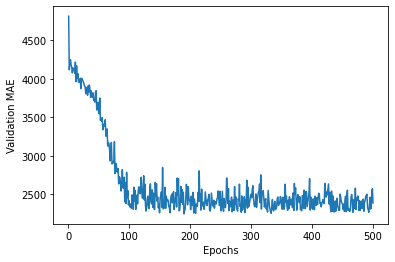

In [72]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

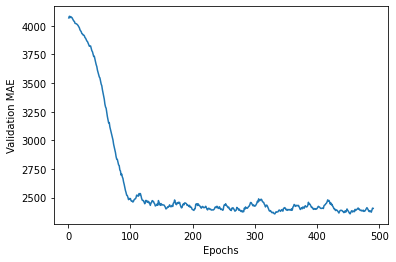

In [73]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
    
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [247]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(9,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [248]:
model = build_model()
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
9/9 [==============================] - 2s 2ms/step - loss: 174763960.0000 - mae: 11624.3311
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 165209094.4000 - mae: 10628.8431
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 142010123.2000 - mae: 9708.5972
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 95420755.2000 - mae: 7318.3497
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 77957483.2000 - mae: 5846.1907
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 55158382.4000 - mae: 4456.1994
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 46926696.0000 - mae: 3966.0967
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 40911887.6000 - mae: 4234.6936
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 32182740.8000 - mae: 4086.3631
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 29755

9/9 [==============================] - 0s 3ms/step - loss: 37415173.4000 - mae: 4522.2940
Epoch 81/200
9/9 [==============================] - 0s 3ms/step - loss: 24195713.6000 - mae: 3682.8733
Epoch 82/200
9/9 [==============================] - 0s 3ms/step - loss: 31714770.2000 - mae: 4250.6896
Epoch 83/200
9/9 [==============================] - 0s 2ms/step - loss: 28094770.0000 - mae: 3927.8892
Epoch 84/200
9/9 [==============================] - 0s 2ms/step - loss: 30822881.2000 - mae: 4037.9673
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 32233704.0000 - mae: 4131.0265
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 41393112.8000 - mae: 4643.3314
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 21447730.4000 - mae: 3470.0709
Epoch 88/200
9/9 [==============================] - 0s 3ms/step - loss: 28165758.2000 - mae: 3852.2375
Epoch 89/200
9/9 [==============================] - 0s 3ms/step - loss: 26674363.2000 

9/9 [==============================] - 0s 1ms/step - loss: 18459450.1000 - mae: 3078.3755
Epoch 160/200
9/9 [==============================] - 0s 1ms/step - loss: 15736782.5000 - mae: 2818.8108
Epoch 161/200
9/9 [==============================] - 0s 1ms/step - loss: 16515606.0000 - mae: 2983.7974
Epoch 162/200
9/9 [==============================] - 0s 1ms/step - loss: 15270936.5000 - mae: 2938.0220
Epoch 163/200
9/9 [==============================] - 0s 1ms/step - loss: 15638955.5000 - mae: 2842.0677
Epoch 164/200
9/9 [==============================] - 0s 1ms/step - loss: 15028539.9000 - mae: 2753.7551
Epoch 165/200
9/9 [==============================] - 0s 1ms/step - loss: 18973756.6000 - mae: 3246.2614
Epoch 166/200
9/9 [==============================] - 0s 1ms/step - loss: 12304977.4000 - mae: 2408.1481
Epoch 167/200
9/9 [==============================] - 0s 2ms/step - loss: 18726629.8000 - mae: 2942.3508
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 12207

In [249]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 168ms/step - loss: 19776294.0000 - mae: 3168.2751


In [250]:
test_mae_score

3168.275146484375

In [251]:
X_test.shape, y_test.shape

((24, 9), (24,))

In [252]:
y_pred = model.predict(X_test)

In [253]:
pd.DataFrame(y_pred, y_test)

,0
price,
16500.000,14913.846680
17859.167,20303.837891
5572.000,6647.174805
12964.000,19313.058594
7129.000,7523.518066
9095.000,10096.288086
13645.000,9902.062500
18280.000,15571.534180
31600.000,24960.710938
